In [1]:
import mgame
import numpy as np
# import importlib
# importlib.reload(mgame)
import matplotlib.pyplot as plt
import nashpy

In [2]:
e = mgame.eq()


In [3]:
nse, nsv = e.findNashEq(e.n, e.PR, e.p_a, e.B, e.pi, e.C_v, e.C_r, e.C_e, e.C_d)

E[v]


sigma_e*(p_a*(B - C_v - pi) + (1 - p_a)*(p_a**n*(B - C_v + pi) + (1 - p_a**n)*(B - C_r - C_v - pi*(PR + n)))) + (1 - sigma_e)*(p_a**n*(-C_v + pi) + (1 - p_a**n)*(-C_r - C_v - pi*(PR + n)))

E[v] simplified


B*sigma_e + C_r*p_a*sigma_e + C_r*p_a**n - C_r*p_a**(n + 1)*sigma_e - C_r - C_v + PR*p_a*pi*sigma_e + PR*p_a**n*pi - PR*p_a**(n + 1)*pi*sigma_e - PR*pi + n*p_a*pi*sigma_e + n*p_a**n*pi - n*p_a**(n + 1)*pi*sigma_e - n*pi - p_a*pi*sigma_e + p_a**n*pi - p_a**(n + 1)*pi*sigma_e

E[v] with nse simplified


(B*C_r*p_a**n - B*C_r - B*C_v + B*PR*p_a**n*pi - B*PR*pi + B*n*p_a**n*pi - B*n*pi + B*p_a**n*pi + B*pi + C_r*p_a*pi - C_r*p_a**(n + 1)*pi + PR*p_a*pi**2 - PR*p_a**(n + 1)*pi**2 + n*p_a*pi**2 - n*p_a**(n + 1)*pi**2 - p_a*pi**2 - p_a**(n + 1)*pi**2)/(p_a*(C_r*p_a**n - C_r + PR*p_a**n*pi - PR*pi + n*p_a**n*pi - n*pi + p_a**n*pi + pi))

E[e]


sigma_v*(p_a*(-C_e + pi) + (1 - p_a)*(p_a**n*(-C_e - pi*(PR + n)) + (1 - p_a**n)*(-C_e + pi))) + (1 - sigma_v)*(-C_e + pi)

E[e] simplified


-C_e - PR*p_a**n*pi*sigma_v + PR*p_a**(n + 1)*pi*sigma_v - n*p_a**n*pi*sigma_v + n*p_a**(n + 1)*pi*sigma_v - p_a**n*pi*sigma_v + p_a**(n + 1)*pi*sigma_v + pi

E[d] simplified


-C_d - PR*p_a**n*pi*sigma_v - n*p_a**n*pi*sigma_v - p_a**n*pi*sigma_v + pi

E[e] with nsv simplified


-C_d + C_d/p_a - C_e/p_a + pi

e is equilibrium: True, check is 0


In [4]:
nse

(C_r*p_a**n - C_r - C_v + PR*p_a**n*pi - PR*pi + n*p_a**n*pi - n*pi + p_a**n*pi + pi)/(p_a*(C_r*p_a**n - C_r + PR*p_a**n*pi - PR*pi + n*p_a**n*pi - n*pi + p_a**n*pi + pi))

In [5]:
nsv

p_a**(-n)*(-C_d + C_e)/(p_a*pi*(PR + n + 1))

In [6]:
n = 1
PR = 2
C_r = 0

B = 10 # no impact on p_a
pi = 2
C_v = 0 # results in lowest p_a possible


C_e = 1 # simply reduces RP utility
C_d = 0

D = pi*(PR + n)
p_a = 0.7

In [7]:
se = nse.subs({e.n:n, e.PR:PR, e.C_r:C_r, e.p_a:p_a, e.pi:pi, e.C_v:C_v})
display(se)
J1, J2, J3, J4 = e.JCU(n, D, p_a, B, pi, C_v, C_r)
jutil = se*J1+(1-se)*J3
jutil

1.42857142857143

12.2857142857143

In [8]:
sv = nsv.subs({e.n:n, e.PR:PR, e.p_a:p_a, e.pi:pi, e.C_e:C_e, e.C_d:C_d})
display(sv)
R1, R2, R3, R4 = e.RPU(n, D, p_a, pi, C_e, C_d)
rutil = sv*R1+(1-sv)*R2
rutil

0.255102040816327

0.571428571428571

In [9]:
R1,R2,R3,R4 =e.RPU(n, D, p_a, pi, C_e, C_d)
RUM = np.array([[R1, R2], [R3, R4]]) #Row player

J1,J2,J3,J4 = e.JCU(n, D, p_a, B, pi, C_v, C_r)
JUM = np.array([[J1, J2],[J3, J4]]) #Col player  

g = nashpy.Game(RUM, JUM)
display(g)
eqs = g.support_enumeration()

for s1, s2 in eqs:
    
    print("RP strategy: {}".format(s1))
    print("JC strategy: {}".format(s2))
    
    RP_util = np.dot(np.dot(s1, RUM), s2)
    JC_util = np.dot(np.dot(s1, JUM), s2)
    
    
    
    print("RP util: {}".format(RP_util))
    print("JC util: {}".format(JC_util))

Bi matrix game with payoff matrices:

Row player:
[[-0.68  1.  ]
 [-3.6   2.  ]]

Column player:
[[ 8.48  8.  ]
 [-0.4  -2.  ]]

RP strategy: [1. 0.]
JC strategy: [1. 0.]
RP util: -0.6800000000000002
JC util: 8.48


In [11]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import timeit

In [18]:
n = 1 # public
PR = 2 # public
C_r = 0 # public

B = -1 # no impact on p_a
pi = 2 # public


# 0 results in lowest p_a,
# unless C_v = 2pi, then for some reason flips to p_a=0
C_v = 0 



C_e = 1 # reduces RP utility for executing
C_d = 0 # reduces RP utility for cheating C_d < C_e

D = pi*(PR + n)
p_a = 0 # JC chooses to maximize utility

# for i in range(0,11):
    
# print("--------i : {}--------".format(i))
# C_e = i


JC_max, x_axis, y_axis_rutil, y_axis_pe, y_axis_jutil, y_axis_pv = e.getEq(n,PR,C_r,     B,pi,C_v,     C_e,C_d, points=101, verbose=False)

display(JC_max)




{'JU': -2.0, 'RU': 2.0, 'p_a': 0.0, 'g': Bi matrix game with payoff matrices:
 
 Row player:
 [[1. 1.]
  [2. 2.]]
 
 Column player:
 [[-7. -3.]
  [-6. -2.]], 'outcomes': array([[0., 0.],
        [0., 1.]]), 'auto': -2}

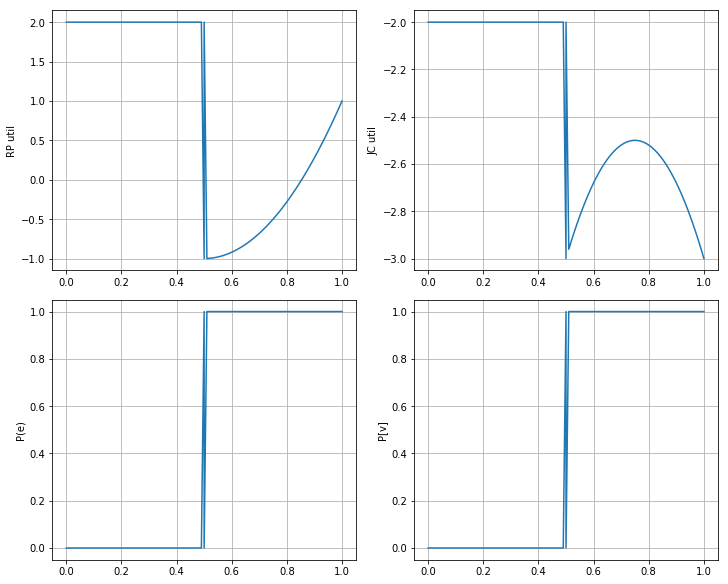

In [27]:

    
fig = plt.figure(constrained_layout=True, figsize=(10,8))
gs = GridSpec(4, 4, figure=fig)
ax1 = fig.add_subplot(gs[0:2, 0:2])
ax2 = fig.add_subplot(gs[2:4, 0:2])
ax3 = fig.add_subplot(gs[0:2, 2:4])
ax4 = fig.add_subplot(gs[2:4, 2:4])

ax1.plot(x_axis,y_axis_rutil, label="RP util")
ax1.set_ylabel('RP util')
ax1.grid(visible=True)
# ax1.set_ylim([-2,2])



ax2.plot(x_axis,y_axis_pe, label="P(execute)")
ax2.set_ylabel('P(e)')
ax2.grid(visible=True)
# ax2.set_ylim([0,2])

ax3.plot(x_axis,y_axis_jutil, label="JC util")
ax3.set_ylabel('JC util')
ax3.grid(visible=True)
# ax2.set_ylim([0,2])

ax4.plot(x_axis,y_axis_pv, label="P(verify)")
ax4.set_ylabel('P[v]')
ax4.grid(visible=True)
# ax4.set_ylim([-2,2])






In [12]:
# mysetup = "import matplotlib.pyplot as plt"
# cmd = 'plt.subplots(ncols=2, nrows=2, constrained_layout=True)'
# timeit.timeit(setup=mysetup, stmt=cmd, number=10)/10

In [ ]:
# mysetup = '''
# import matplotlib.pyplot as plt
# from __main__ import testspec
# '''
                    

# def testspec():
#     fig = plt.figure(constrained_layout=True)
#     gs = GridSpec(4, 4, figure=fig)
#     ax1 = fig.add_subplot(gs[0:2, 0:2])
#     ax2 = fig.add_subplot(gs[2:4, 0:2])
#     ax3 = fig.add_subplot(gs[0:2, 2:4])
#     ax4 = fig.add_subplot(gs[2:4, 2:4])

# mycode = '''testspec()'''

# timeit.timeit(setup=mysetup, stmt=mycode, number=10)/10